
<font color="#1874CD"><h1 align="left">**Datamecum**</h1></font>
<font color="#6E6E6E"><h2 align="left">**Árboles de decisión y SVM**</h2></font>
<font color="#6E6E6E"><h3 align="left">Notebook: árboles de decisión y SVM</h3></font>
***

El objetivo de este *notebook* es que desarrollemos el código para solucionar un problema de clasificación.

## Selección de los datos

In [1]:
## Escogemos los datos
from sklearn.datasets import load_breast_cancer

## Librerías
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

## Fijamos semilla para reproducir resultados
random.seed(1)

## Control de warnings
import warnings
warnings.filterwarnings('once')

In [2]:
## Es una función
load_breast_cancer

<function sklearn.datasets._base.load_breast_cancer(*, return_X_y=False, as_frame=False)>

In [3]:
## Ayuda de una función
help(load_breast_cancer)

Help on function load_breast_cancer in module sklearn.datasets._base:

load_breast_cancer(*, return_X_y=False, as_frame=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
    downloaded from:
    https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more informatio

In [4]:
## Ejecutamos la función
data = load_breast_cancer()

In [5]:
## Vemos qué es: diccionario con diferentes clave-valor
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
## Miramos qué claves contiene
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
## Imprimimos la descripción
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
data = load_breast_cancer(as_frame=True)

In [9]:
data["data"]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [10]:
## Para visualizarlo bien
pd.options.display.max_columns = None
data["data"]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  radius error  texture error  perimeter error  \
0                   0.07871        1.0950         0.9053            8.589   
1                   0.05667        0.5435         0.7339            3.398   
2                   0.05999        0.7456         0.7869            4.585   
3                   0.09744        0.4956         1.1560            3.445   
4                   0.05883        0.7572         0.7813            5.438   
..                      ...           ...            ...              ...   
564                 0.05623        1.1760         1.2560            7.673   
565                 0.05533        0.7655         2.4630            5.203   
566                 0.05648        0.4564         1.0750            3.425   
567                 0.07016        0.7260         1.5950            5.772   
568                 0.05884        0.3857         1.4280            2.548   

     area error  smoothness error  compactness error  concavity error  \
0        153.40          0.006399            0.04904          0.05373   
1         74.08          0.005225            0.01308          0.01860   
2         94.03          0.006150            0.04006          0.03832   
3         27.23          0.009110            0.07458          0.05661   
4         94.44          0.011490            0.02461          0.05688   
..          ...               ...                ...              ...   
564      158.70          0.010300            0.02891          0.05198   
565       99.04          0.005769            0.02423          0.03950   
566       48.55          0.005903            0.03731          0.04730   
567       86.22          0.006522            0.06158          0.07117   
568       19.15          0.007189            0.00466          0.00000   

     concave points error  symmetry error  fractal dimension error  \
0                 0.01587         0.03003                 0.006193   
1                 0.01340         0.01389                 0.003532   
2                 0.02058         0.02250                 0.004571   
3                 0.01867         0.05963                 0.0

In [11]:
data["target_names"]

## 0: maligno y 1: benigno

array(['malignant', 'benign'], dtype='<U9')

In [12]:
## Nos falta el target
df = data["data"]
df["class"] = data["target"]

df.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  class  
0                  0.11890      0  
1                  0.08902      0  
2                  0.08758      0  
3                  0.17300      0  
4                  0.07678      0

## Análisis exploratorio

In [13]:
## Obtención de análisis descriptivo
df.describe().T[["count", "min", "max", "mean", "std"]]

count         min         max        mean         std
mean radius              569.0    6.981000    28.11000   14.127292    3.524049
mean texture             569.0    9.710000    39.28000   19.289649    4.301036
mean perimeter           569.0   43.790000   188.50000   91.969033   24.298981
mean area                569.0  143.500000  2501.00000  654.889104  351.914129
mean smoothness          569.0    0.052630     0.16340    0.096360    0.014064
mean compactness         569.0    0.019380     0.34540    0.104341    0.052813
mean concavity           569.0    0.000000     0.42680    0.088799    0.079720
mean concave points      569.0    0.000000     0.20120    0.048919    0.038803
mean symmetry            569.0    0.106000     0.30400    0.181162    0.027414
mean fractal dimension   569.0    0.049960     0.09744    0.062798    0.007060
radius error             569.0    0.111500     2.87300    0.405172    0.277313
texture error            569.0    0.360200     4.88500    1.216853    0.551648
perimeter error          569.0    0.757000    21.98000    2.866059    2.021855
area error               569.0    6.802000   542.20000   40.337079   45.491006
smoothness error         569.0    0.001713     0.03113    0.007041    0.003003
compactness error        569.0    0.002252     0.13540    0.025478    0.017908
concavity error          569.0    0.000000     0.39600    0.031894    0.030186
concave points error     569.0    0.000000     0.05279    0.011796    0.006170
symmetry error           569.0    0.007882     0.07895    0.020542    0.008266
fractal dimension error  569.0    0.000895     0.02984    0.003795    0.002646
worst radius             569.0    7.930000    36.04000   16.269190    4.833242
worst texture            569.0   12.020000    49.54000   25.677223    6.146258
worst perimeter          569.0   50.410000   251.20000  107.261213   33.602542
worst area               569.0  185.200000  4254.00000  880.583128  569.356993
worst smoothness         569.0    0.071170     0.22260    0.132369    0.022832
worst compactness        569.0    0.027290     1.05800    0.254265    0.157336
worst concavity          569.0    0.000000     1.25200    0.272188    0.208624
worst concave points     569.0    0.000000     0.29100    0.114606    0.065732
worst symmetry           569.0    0.156500     0.66380    0.290076    0.061867
worst fractal dimension  569.0    0.055040     0.20750    0.083946    0.018061
class                    569.0    0.000000     1.00000    0.627417    0.483918

In [14]:
## Verificamos que no hay valores ausentes
df.isna().sum().sum()

0

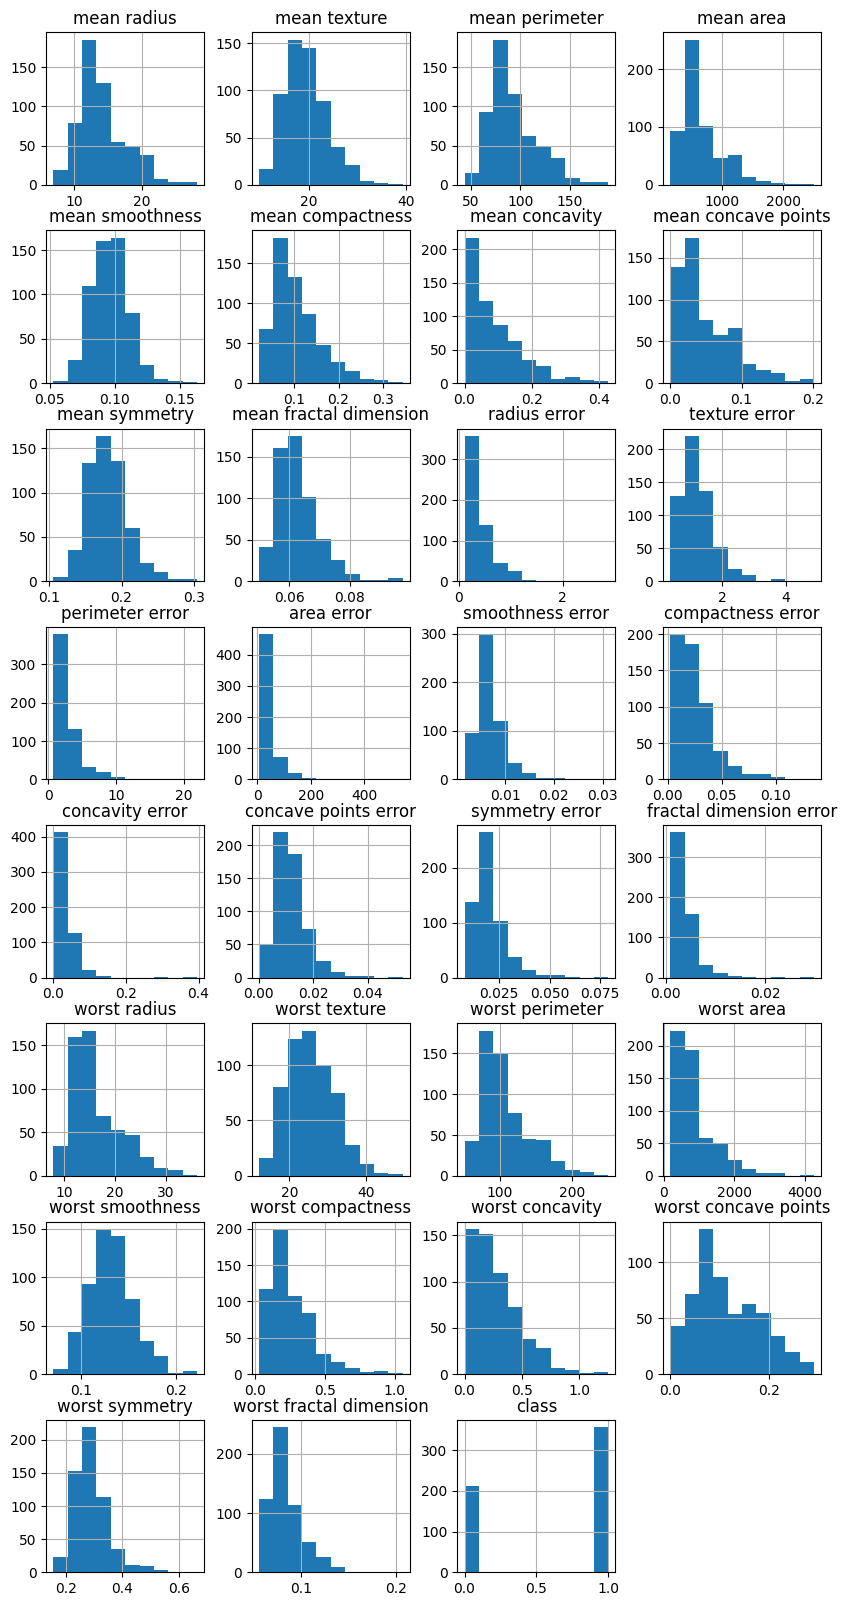

In [15]:
df.hist(figsize=(10, 20), layout=(-1, 4));
## Poniendo ; evitamos que la última línea salga por pantalla

In [16]:
## Correlaciones entre las variables
df.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
class                      -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

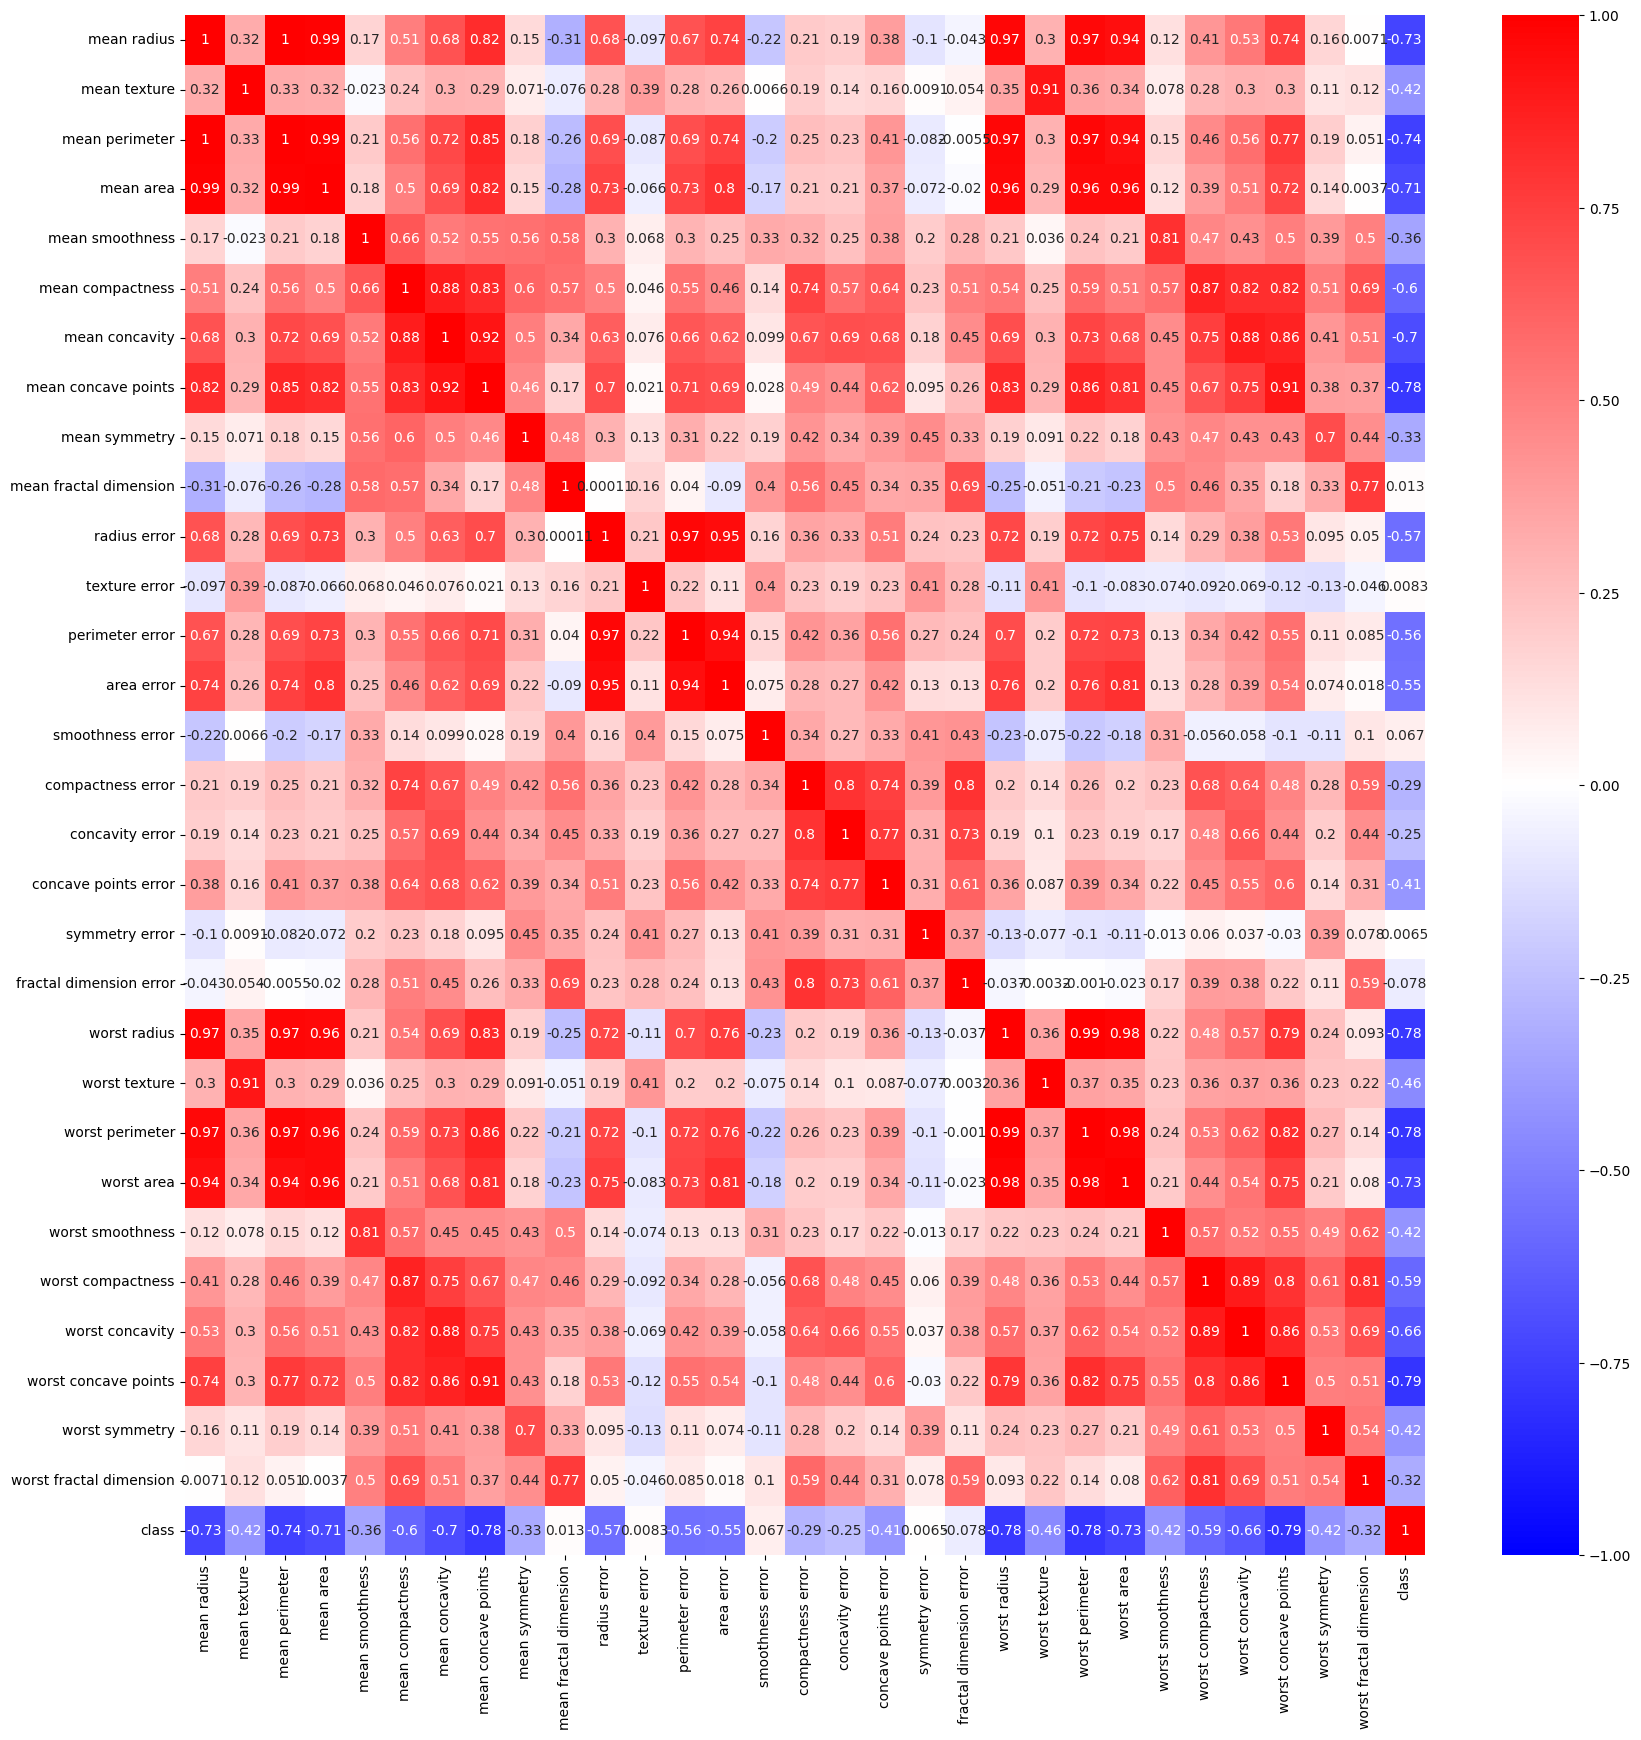

In [19]:
## Más visual
plt.figure(figsize=(20, 20)) ## Para mostrar todas las variables
sns.heatmap(df.corr(), 
            cmap = "bwr", 
            vmin = -1, 
            vmax = 1, 
            annot = True, 
            cbar = True);

## Importante poner máximo y mínimo porque sino considera como máximo la máxima correlación que obtenemos
## (que será 1 al considerar correlaciones de una variable con ella misma) y como mínimo la mínima 
## correlación que obtenemos y puede desvirtuar la escala

<Figure size 2000x2000 with 0 Axes>

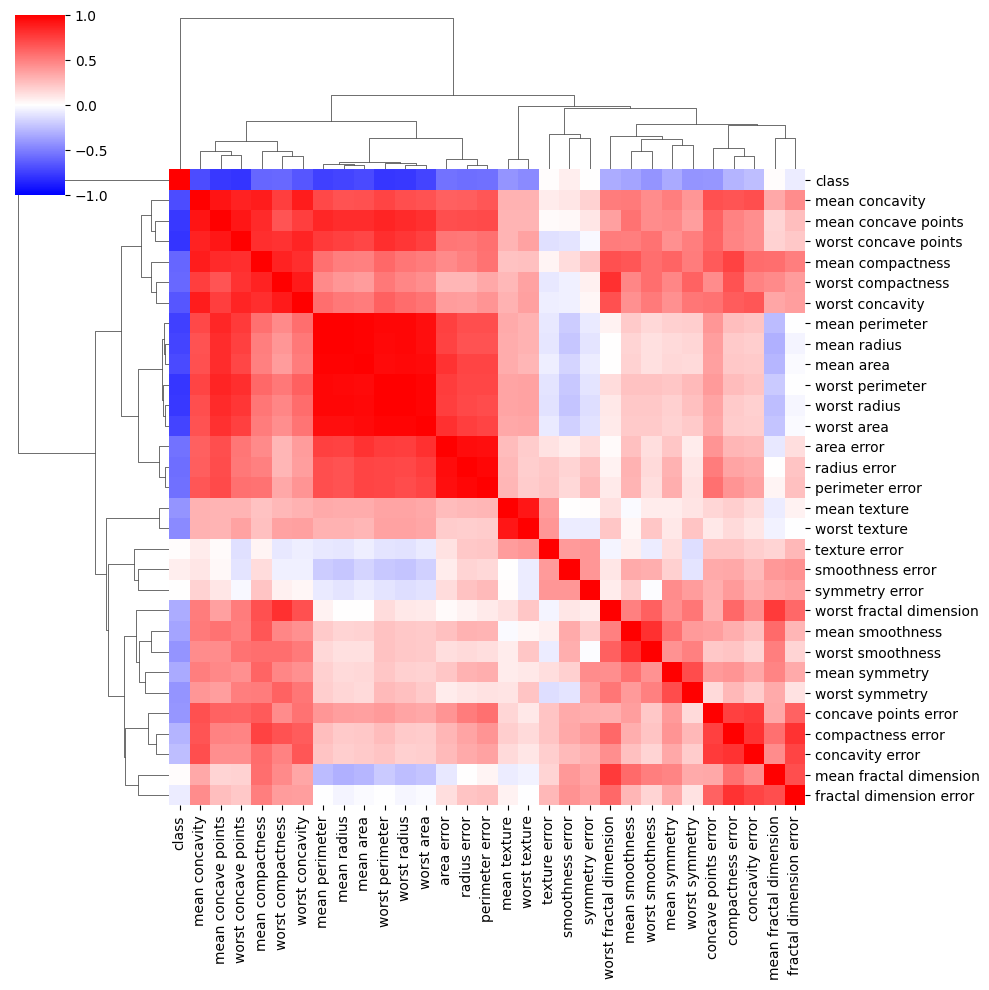

In [20]:
## Mismo dibujo pero segmentado por clusters, se reordena creando grupos de variables similares en correlación
plt.figure(figsize=(20, 20)) ## Para mostrar todas las variables
sns.clustermap(df.corr(), cmap = "bwr", vmin = -1, vmax = 1);

## División de los datos

In [21]:
## Importamos las librerías necesarias
from sklearn.model_selection import train_test_split

In [22]:
## Establecemos nombre de target y atributos
target_column = 'class'
attribute_column = df.columns.drop(target_column).to_list()

print(f"Target: {target_column}")
print(f"Atributos: {attribute_column}")

Target: class
Atributos: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [23]:
## ------------------------------------------- ##
## División en entrenamiento y test
## ------------------------------------------- ##

df_train, df_test = train_test_split(df, test_size=0.3, 
                                     random_state=1, 
                                     stratify=df["class"])

In [24]:
## Separamos target y variables predictoras
y_train = df_train[target_column]
X_train = df_train[attribute_column]

## Otra forma
#X_train = df_train.drop("class", axis=1)

y_test = df_test[target_column]
X_test = df_test[attribute_column]

In [25]:
## Comprobamos dimensiones
print(f"Dimensiones train: {X_train.shape}.")
print(f"Dimensiones test: {X_test.shape}.")

Dimensiones train: (398, 30).
Dimensiones test: (171, 30).


In [26]:
## ¿Mantenemos proporciones?
print(f"Proporción del target en train: {y_train.value_counts() / len(y_train)}")
print(f"Proporción del target en test: {y_test.value_counts() / len(y_test)}")

Proporción del target en train: 1    0.628141
0    0.371859
Name: class, dtype: float64
Proporción del target en test: 1    0.625731
0    0.374269
Name: class, dtype: float64


## Entrenamiento de un árbol de clasificación

In [27]:
## Importamos librería para entrenar árbol de clasificación
from sklearn.tree import DecisionTreeClassifier

In [28]:
## ------------------------------------------- ##
## Árbol de decisión
## ------------------------------------------- ##

## Instanciamos sin límite de poda
model = DecisionTreeClassifier()

## Entrenamos con el conjunto de entrenamiento
model.fit(X_train, y_train)

## Accuracy en train y test
print(f"Accuracy (train, test): {model.score(X_train, y_train), model.score(X_test, y_test)}")

Accuracy (train, test): (1.0, 0.9473684210526315)


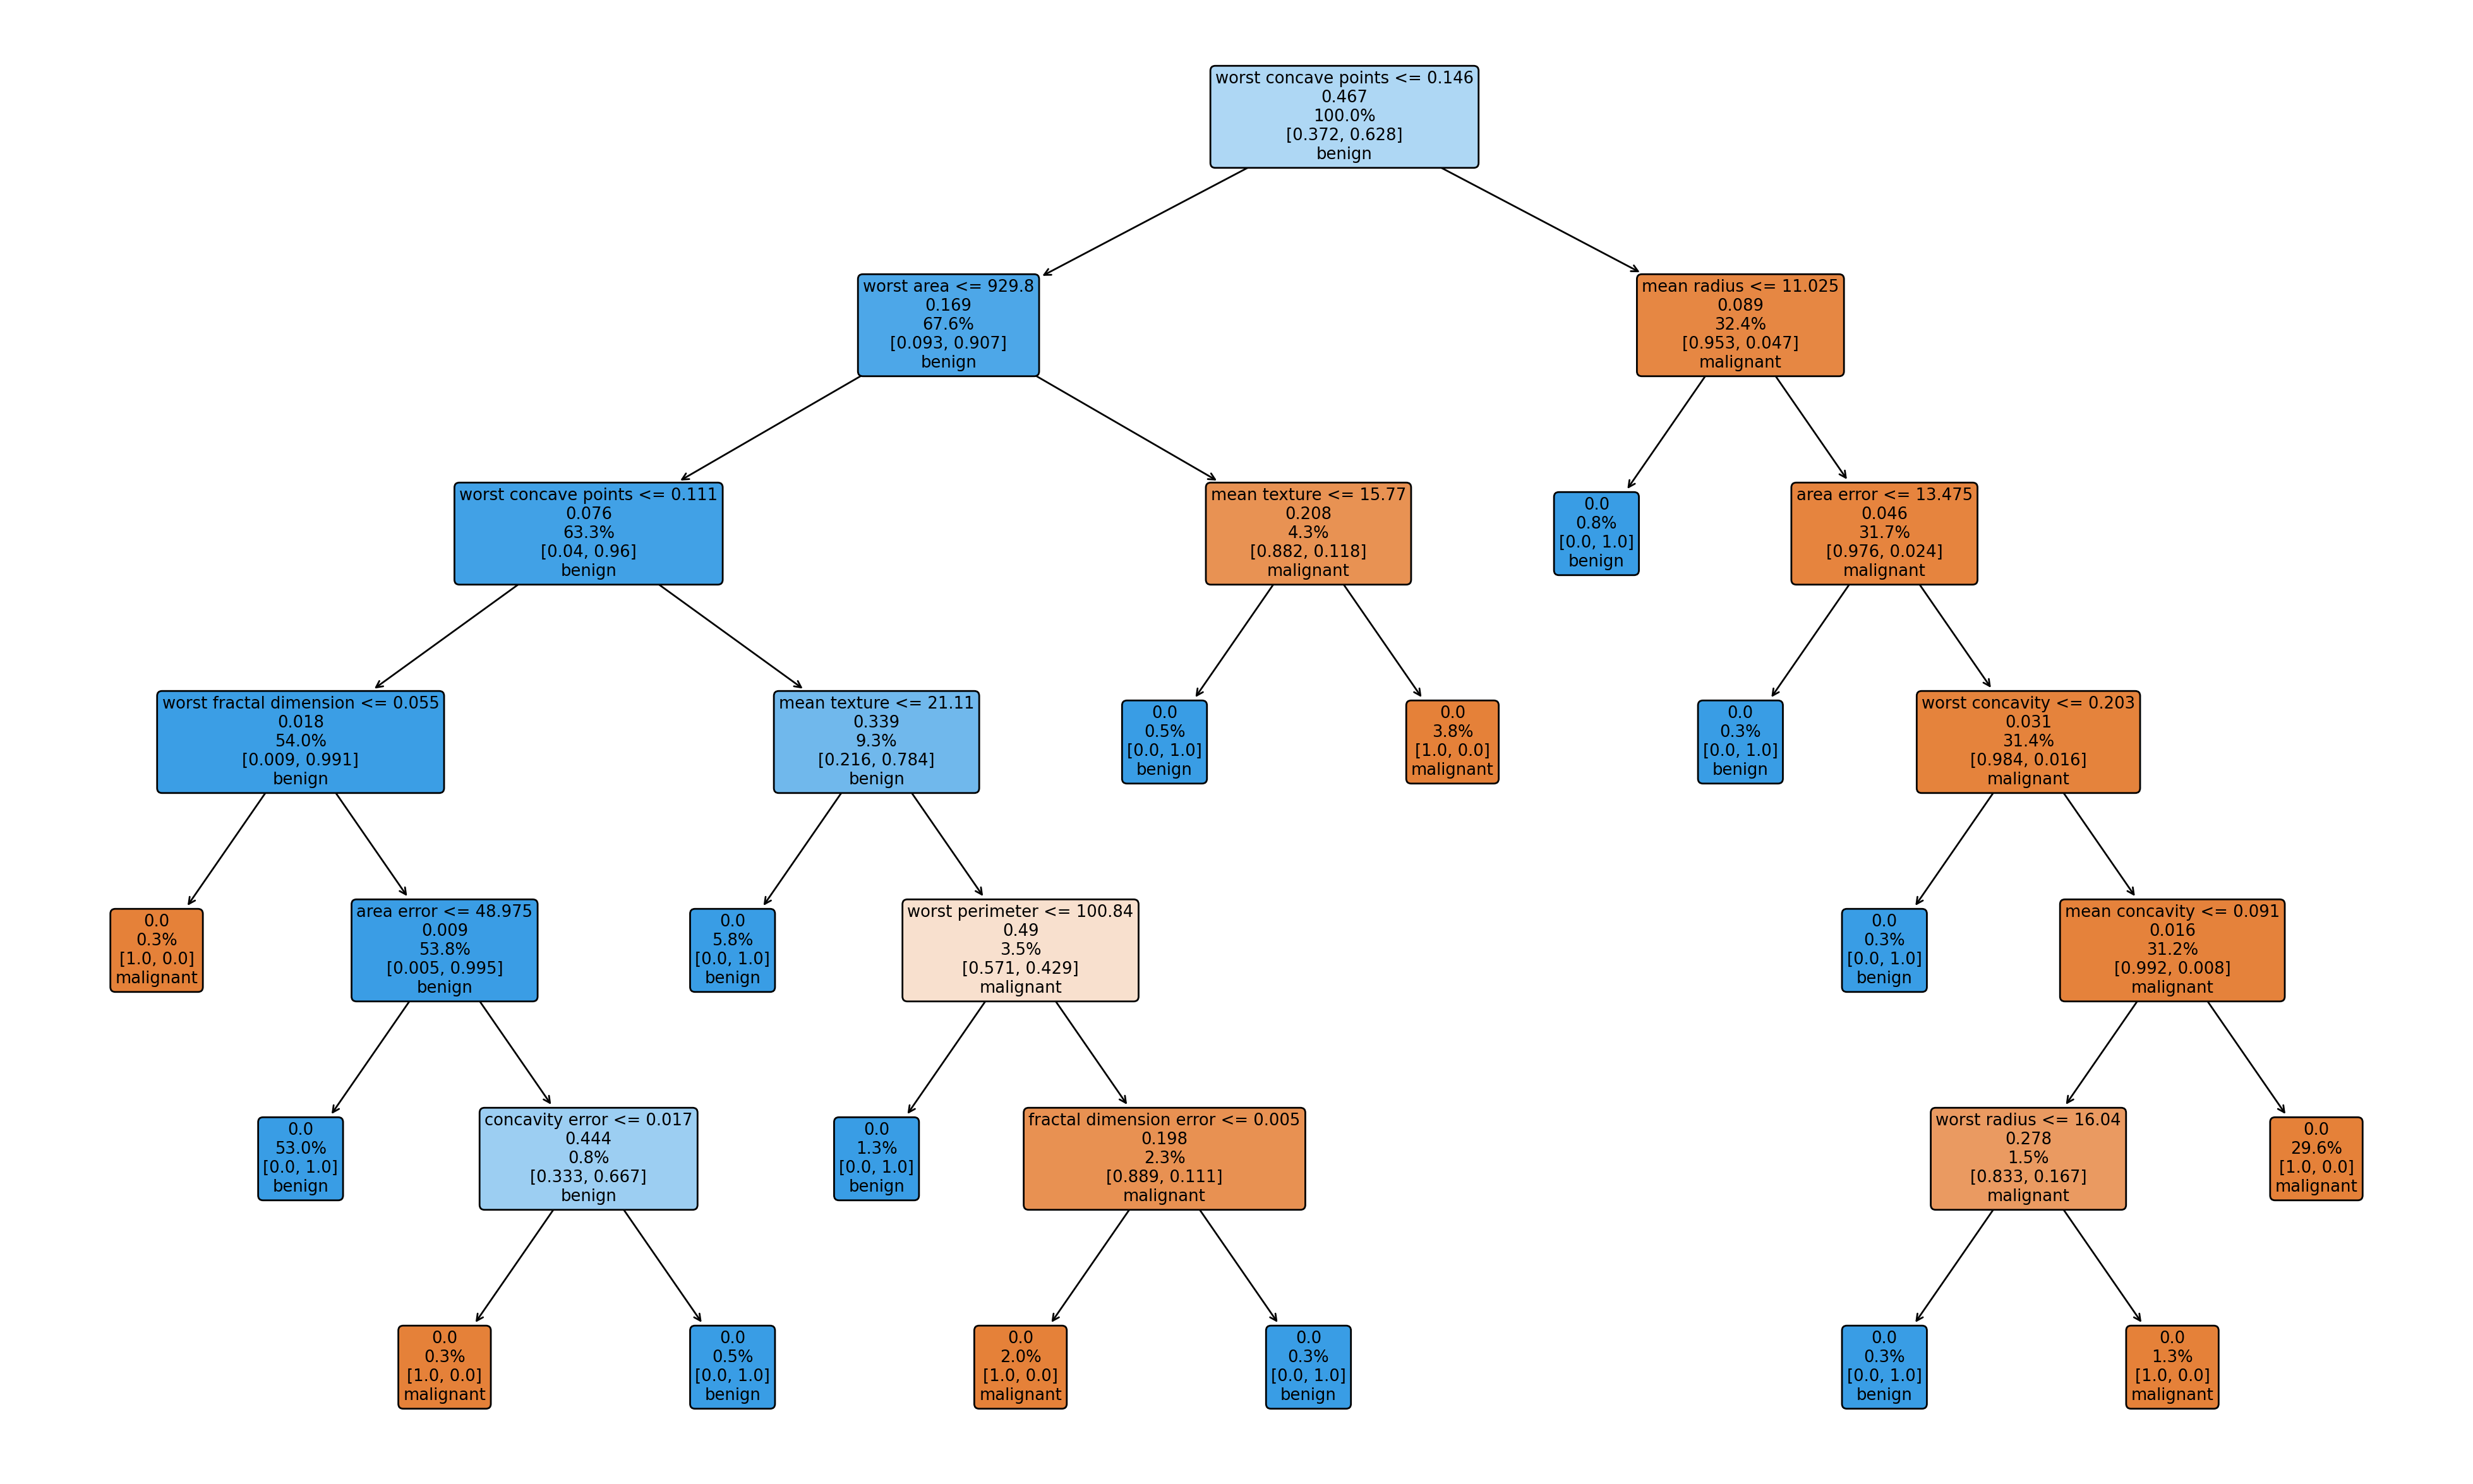

In [29]:
## ------------------------------------------- ##
## Visualización del árbol
## ------------------------------------------- ##

## Importamos librería para visualizar el árbol
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15), dpi=200)
plot_tree(model, 
          rounded=True, 
          proportion=True, 
          label='none',
          feature_names=attribute_column,
          class_names=data["target_names"].tolist(), ## Para poder visualizar con nombres
          filled=True);

## Respuesta a la pregunta: si es que no, hacia la derecha
## Respuesta a la pregunta: si es que sí, hacia la izquierda

In [30]:
## ------------------------------------------- ##
## Reglas en texto
## ------------------------------------------- ##

## Importamos librería para visualizar las reglas
from sklearn.tree import export_text

## Reglas
texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = attribute_column
               )
print(texto_modelo)

|--- worst concave points <= 0.15
|   |--- worst area <= 929.80
|   |   |--- worst concave points <= 0.11
|   |   |   |--- worst fractal dimension <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- worst fractal dimension >  0.06
|   |   |   |   |--- area error <= 48.98
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- area error >  48.98
|   |   |   |   |   |--- concavity error <= 0.02
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- concavity error >  0.02
|   |   |   |   |   |   |--- class: 1
|   |   |--- worst concave points >  0.11
|   |   |   |--- mean texture <= 21.11
|   |   |   |   |--- class: 1
|   |   |   |--- mean texture >  21.11
|   |   |   |   |--- worst perimeter <= 100.84
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst perimeter >  100.84
|   |   |   |   |   |--- fractal dimension error <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- fractal dimension error >  0.01
|   |   |   |   |   |   |--- class: 1
|   |---

In [31]:
## ------------------------------------------- ##
## Importancia de los predictores
## ------------------------------------------- ##

importancia_predictores = pd.DataFrame(
                            {'predictor': attribute_column,
                             'importancia': model.feature_importances_}
                            )

print("Importancia de los predictores en el modelo")
print("")

importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo



predictor  importancia
27     worst concave points     0.709073
23               worst area     0.121645
1              mean texture     0.049550
0               mean radius     0.030037
22          worst perimeter     0.027319
13               area error     0.013868
29  worst fractal dimension     0.010607
26          worst concavity     0.010499
19  fractal dimension error     0.009562
20             worst radius     0.008964
16          concavity error     0.007171
6            mean concavity     0.001706
7       mean concave points     0.000000
28           worst symmetry     0.000000
2            mean perimeter     0.000000
25        worst compactness     0.000000
24         worst smoothness     0.000000
3                 mean area     0.000000
4           mean smoothness     0.000000
21            worst texture     0.000000
18           symmetry error     0.000000
8             mean symmetry     0.000000
17     concave points error     0.000000
5          mean compactness     0.000000
14         smoothness error     0.000000
12          perimeter error     0.000000
11            texture error     0.000000
10             radius error     0.000000
9    mean fractal dimension     0.000000
15        compactness error     0.000000

## Optimizamos hiperparámetros

In [32]:
## ------------------------------------------- ##
## Optimización con grid search
## ------------------------------------------- ##

## Importamos la librería para realizar un grid search
from sklearn.model_selection import GridSearchCV

## Hacemos el grid search
param_grid = {"max_leaf_nodes": range(2, 20), ## número máximo de nodos hojas: entre 2 y 19
              "min_samples_split": [0.05, 0.1, 0.15], ## fracción de muestras para poder dividir el nodo
              "max_depth": range(2, 5) #,
              #"min_samples_leaf": [0.1, 0.15]
              } ## máxima profundidad: entre 2 y 4

grid = GridSearchCV(DecisionTreeClassifier(), 
                    param_grid, 
                    cv=10,
                    verbose=3, 
                    scoring="roc_auc")

grid.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV 1/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.767 total time=   0.0s
[CV 2/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.813 total time=   0.0s
[CV 3/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.860 total time=   0.0s
[CV 4/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.827 total time=   0.0s
[CV 5/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.907 total time=   0.0s
[CV 6/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.847 total time=   0.0s
[CV 7/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.913 total time=   0.0s
[CV 8/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.900 total time=   0.0s
[CV 9/10] END max_depth=2, max_leaf_nodes=2, min_samples_split=0.05;, score=0.909 total time=   0.0s
[CV 10/10] END max_depth=2

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 5),
                         'max_leaf_nodes': range(2, 20),
                         'min_samples_split': [0.05, 0.1, 0.15]},
             scoring='roc_auc', verbose=3)

In [33]:
## Mejor modelo
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=11, min_samples_split=0.05)

In [34]:
## Lo guardamos para usarlo
model_gridsearch = grid.best_estimator_

Accuracy training = 0.9798994974874372
Accuracy test = 0.935672514619883

AUC en train: 0.9957837837837837
AUC en test: 0.9672167056074767

Precisión en test: 0.9615384615384616
Recall en test: 0.9345794392523364
Especificidad en test: 0.9375

[[ 60   4]
 [  7 100]]


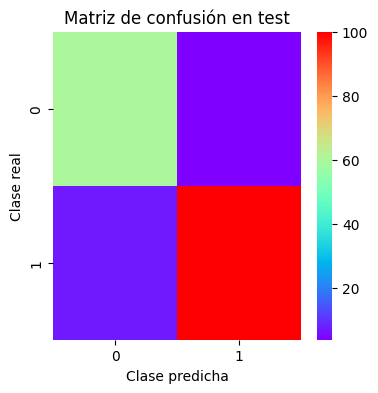

In [35]:
## ------------------------------------------- ##
## Métricas
## ------------------------------------------- ##

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve, auc

## Calidad predictiva del modelo

print("Accuracy training = {}".format(model_gridsearch.score(X_train, y_train)))
print("Accuracy test = {}".format(model_gridsearch.score(X_test, y_test)))

## Calculamos estadístico AUC en train y test
print(f"\nAUC en train: {roc_auc_score(y_train, model_gridsearch.predict_proba(X_train)[:, 1])}")
print(f"AUC en test: {roc_auc_score(y_test, model_gridsearch.predict_proba(X_test)[:, 1])}")

## Calculamos también precisión y recall en test (sobre clase 1 que es benigno)
print(f"\nPrecisión en test: {precision_score(y_test, model_gridsearch.predict(X_test))}")
print(f"Recall en test: {recall_score(y_test, model_gridsearch.predict(X_test))}")

## Especificidad (sobre clase 0 que es la maligna)
tn, fp, fn, tp = confusion_matrix(y_test, model_gridsearch.predict(X_test)).ravel() ## Con ravel (de numpy) podemos extender una matriz y poder asignar los valores del numpy 1D
specificity = tn / (tn+fp)
print(f"Especificidad en test: {specificity}\n")

## Representación de la matriz de confusión
confusion_matrix_test = confusion_matrix(y_test, model_gridsearch.predict(X_test))
print(confusion_matrix_test) # row: real class; column: predicted class

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_test, cmap=plt.cm.rainbow)
plt.title("Matriz de confusión en test")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha');

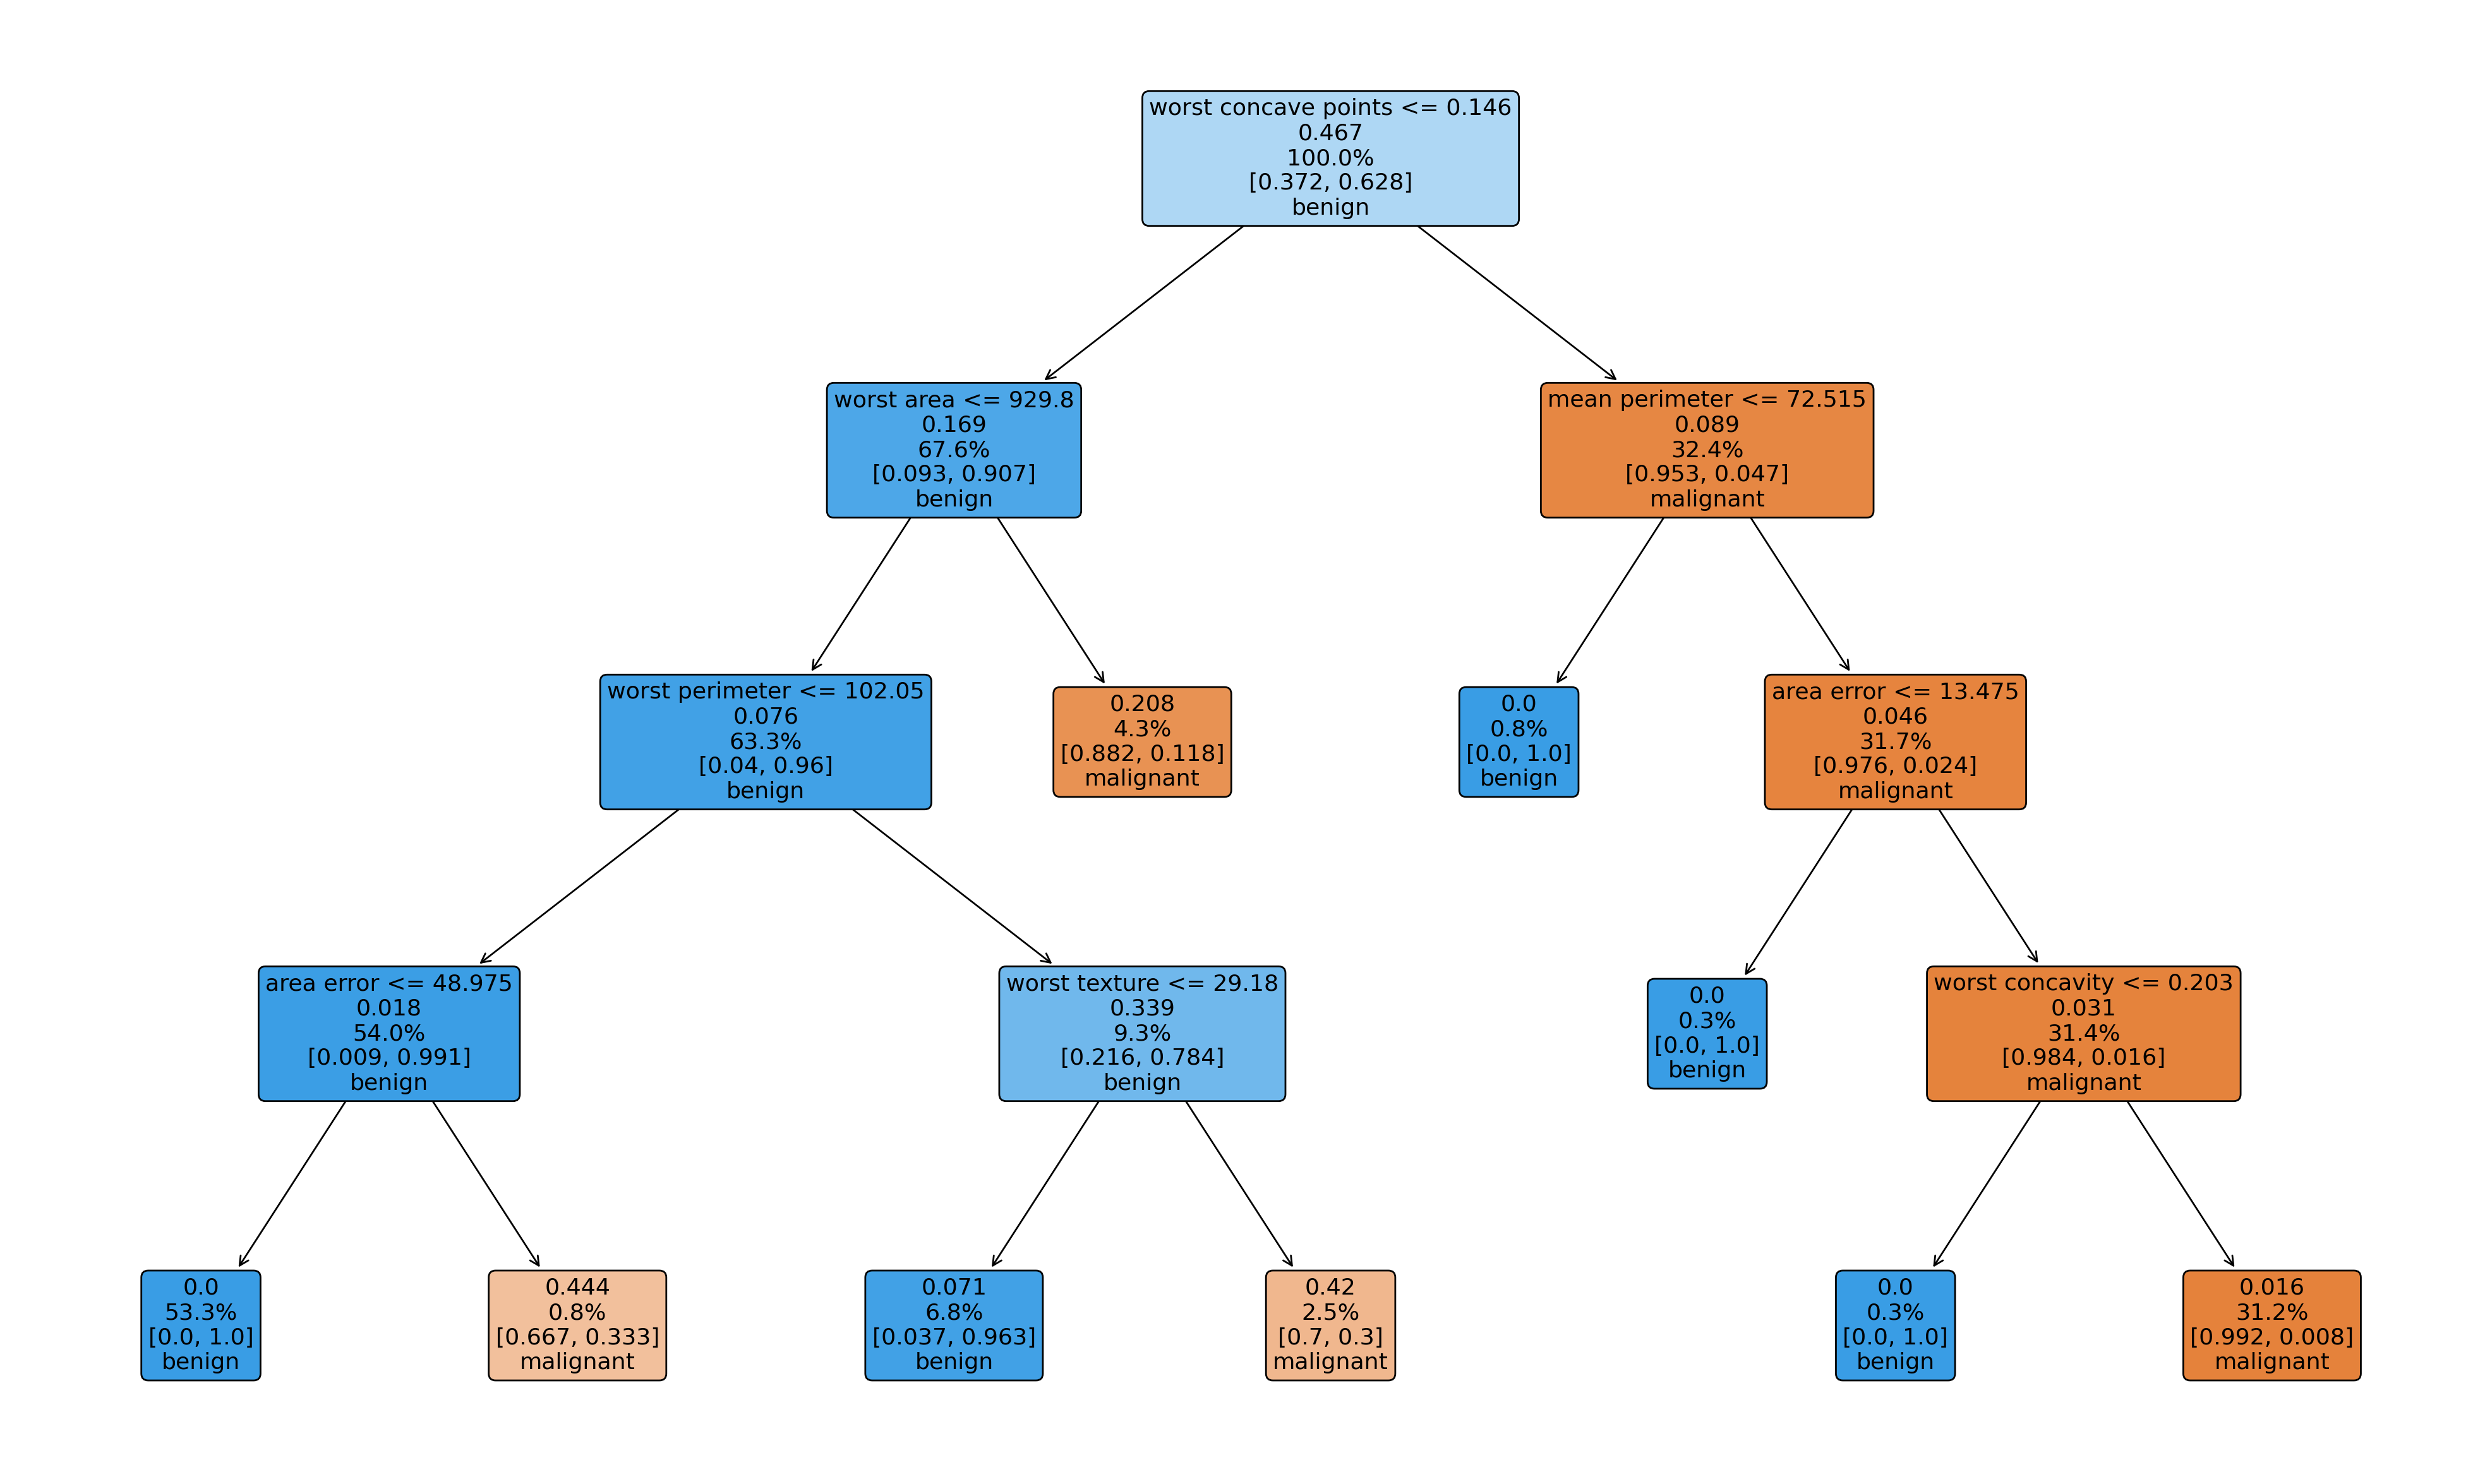

In [36]:
## ------------------------------------------- ##
## Visualización del árbol
## ------------------------------------------- ##

plt.figure(figsize=(25,15), dpi=200)
plot_tree(model_gridsearch, 
          rounded=True, 
          proportion=True, 
          label='none',
          feature_names=attribute_column,
          class_names=data["target_names"].tolist(),
          filled=True);

## Respuesta a la pregunta: si es que no, hacia la derecha
## Respuesta a la pregunta: si es que sí, hacia la izquierda

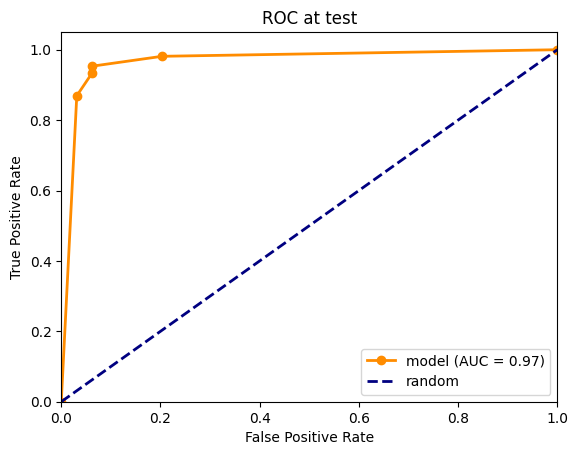

In [37]:
## ------------------------------------------- ##
## Curva ROC
## ------------------------------------------- ##

y_test_proba_predict  = model_gridsearch.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test,
                                 y_test_proba_predict[:,1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, "-o", color='darkorange',
         lw=2, label='model (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC at test')
plt.legend(loc="lower right");

## Comparativa con modelo lineal

Para este problema probamos con una regresión logística.

Recordar que en una regresión logística los datos se tienen que normalizar. En este caso, vamos a estandarizar las varibles, es decir, centrarlas en 0 y con desviación estándar 1 para evitar tener rangos de variables muy distintos:

$XtrainEstandarizado = \frac{Xtrain - media(Xtrain)}{std(Xtrain)}$

Destacar que la normalización o estandarización de los datos debe hacerse en el conjunto de entrenamiento, ya que son los datos con los que contamos y sí sabemos su *target* real. Después, esta transformación resultante se aplica sobre el conjunto de test.

In [38]:
## ------------------------------------------- ##
## Estandarización
## ------------------------------------------- ##

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

## Calculo las medias y std de todas las variables en el conjunto de entrenamiento
scaler.fit(X_train)

## Se aplican los valores calculados
X_train_estand = scaler.transform(X_train) ## X_train_estand es la versión estandarizada de X_train
X_test_estand = scaler.transform(X_test) ## X_test_estan es la versión estandarizada de X_test

Comprobamos que efectivamente hemos estandarizado correctamente los datos.

In [39]:
X_train.std()

mean radius                  3.539684
mean texture                 4.364351
mean perimeter              24.549412
mean area                  356.798074
mean smoothness              0.013838
mean compactness             0.053627
mean concavity               0.082528
mean concave points          0.039536
mean symmetry                0.027146
mean fractal dimension       0.007006
radius error                 0.285068
texture error                0.521761
perimeter error              2.118317
area error                  48.971761
smoothness error             0.002687
compactness error            0.017576
concavity error              0.031657
concave points error         0.005970
symmetry error               0.008112
fractal dimension error      0.002627
worst radius                 4.881291
worst texture                6.199236
worst perimeter             34.168283
worst area                 583.121557
worst smoothness             0.022608
worst compactness            0.162018
worst concav

In [40]:
X_train.mean()

mean radius                 14.064967
mean texture                19.371985
mean perimeter              91.603166
mean area                  649.571106
mean smoothness              0.096888
mean compactness             0.105293
mean concavity               0.090371
mean concave points          0.049280
mean symmetry                0.182075
mean fractal dimension       0.063054
radius error                 0.403160
texture error                1.207992
perimeter error              2.860047
area error                  40.417573
smoothness error             0.006914
compactness error            0.025246
concavity error              0.032246
concave points error         0.011820
symmetry error               0.020372
fractal dimension error      0.003801
worst radius                16.234103
worst texture               25.845754
worst perimeter            107.103945
worst area                 878.801005
worst smoothness             0.132892
worst compactness            0.258718
worst concav

In [41]:
## Vemos que efectivamente la media está centrada en 0
X_train_estand.mean(axis=0)

array([ 1.82991534e-16, -3.68214671e-16,  2.12002387e-16,  2.23160407e-16,
       -2.23160407e-17,  1.07116995e-16, -1.04885391e-16,  1.69601909e-16,
       -2.38781635e-16, -1.01761146e-15, -6.24849139e-17, -1.53980681e-16,
        2.23160407e-18,  4.68636855e-17, -4.15078357e-16,  2.20928803e-16,
       -5.35584977e-17, -1.11580203e-16,  3.34740610e-16,  1.95265356e-17,
        5.80217058e-17, -2.05307574e-16,  1.58443889e-16,  2.00844366e-17,
       -1.82991534e-16,  7.14113302e-17,  3.57056651e-17, -1.02653787e-16,
       -6.48280982e-16,  6.02533099e-16])

In [42]:
## Vemos que efectivamente la desviación típica es 1
X_train_estand.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
## ------------------------------------------- ##
## Regresión logística
## ------------------------------------------- ##

from sklearn.linear_model import LogisticRegression

## Instancio la regresión logística
log_model = LogisticRegression()

## Entrenamos con los datos estandarizados
log_model.fit(X_train_estand, y_train)


LogisticRegression()

Accuracy training = 0.992462311557789
Accuracy test = 0.9590643274853801

AUC en train: 0.9973513513513513
AUC en test: 0.994304906542056

Precisión en test: 0.9545454545454546
Recall en test: 0.9813084112149533
Especificidad en test: 0.9375

[[ 59   5]
 [  2 105]]


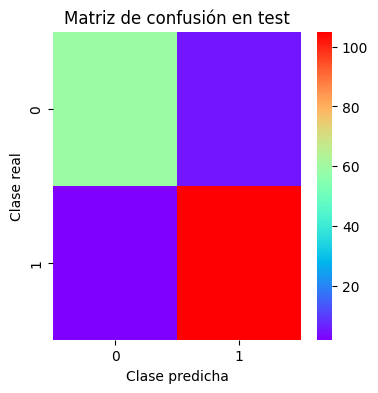

In [44]:
## ------------------------------------------- ##
## Calidad predictiva del modelo
## ------------------------------------------- ##

print("Accuracy training = {}".format(log_model.score(X_train_estand, y_train)))
print("Accuracy test = {}".format(log_model.score(X_test_estand, y_test)))

## Calculamos estadístico AUC en train y test
print(f"\nAUC en train: {roc_auc_score(y_train, log_model.predict_proba(X_train_estand)[:, 1])}")
print(f"AUC en test: {roc_auc_score(y_test, log_model.predict_proba(X_test_estand)[:, 1])}")

## Calculamos también precisión y recall en test
print(f"\nPrecisión en test: {precision_score(y_test, log_model.predict(X_test_estand))}")
print(f"Recall en test: {recall_score(y_test, log_model.predict(X_test_estand))}")

## Especificidad (sobre clase 0 que es la maligna)
tn, fp, fn, tp = confusion_matrix(y_test, model_gridsearch.predict(X_test)).ravel() ## Con ravel (de numpy) podemos extender una matriz y poder asignar los valores del numpy 1D
specificity = tn / (tn+fp)
print(f"Especificidad en test: {specificity}\n")

# Represenetación de la matriz de confusión
confusion_matrix_test = confusion_matrix(y_test, log_model.predict(X_test_estand))
print(confusion_matrix_test) # row: real class; column: predicted class

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_test, cmap=plt.cm.rainbow)
plt.title("Matriz de confusión en test")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha');

## SVM

Aplicamos ahora también un SVM para clasificar.

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [46]:
## ------------------------------------------- ##
## SVM: grid search
## ------------------------------------------- ##

grid = [{'C': [1, 10, 100], 
         'gamma': [0.1, 0.01, 0.001], 
         'kernel': ['rbf', 'poly'],
         'degree': [2, 3],
         'coef0': [1.0]
        },
       ]

clf_gridsearch = GridSearchCV(estimator=SVC(probability=True), param_grid=grid, cv=5)
clf_gridsearch.fit(X_train_estand, y_train) 

## Recordar que si quiero aplicar predict_proba tengo que activar el parámetro probability!

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100], 'coef0': [1.0], 'degree': [2, 3],
                          'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'poly']}])

In [47]:
## Nos quedamos con el mejor
print("Best score = ", clf_gridsearch.best_score_)
clf = clf_gridsearch.best_estimator_
print("Best model: ")
print(clf)

Best score =  0.9799050632911392
Best model: 
SVC(C=100, coef0=1.0, degree=2, gamma=0.001, probability=True)


Accuracy training = 0.9874371859296482
Accuracy test = 0.9766081871345029

AUC en train: 0.9966756756756757
AUC en test: 0.9970794392523364

Precisión en test: 0.963963963963964
Recall en test: 1.0
Especificidad en test: 0.9375

[[ 60   4]
 [  0 107]]


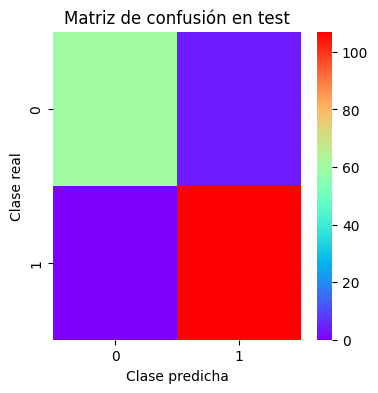

In [48]:
## ------------------------------------------- ##
## Calidad predictiva del modelo
## ------------------------------------------- ##

print("Accuracy training = {}".format(clf.score(X_train_estand, y_train)))
print("Accuracy test = {}".format(clf.score(X_test_estand, y_test)))

## Calculamos estadístico AUC en train y test
print(f"\nAUC en train: {roc_auc_score(y_train, clf.predict_proba(X_train_estand)[:, 1])}")
print(f"AUC en test: {roc_auc_score(y_test, clf.predict_proba(X_test_estand)[:, 1])}")

## Calculamos también precisión y recall en test
print(f"\nPrecisión en test: {precision_score(y_test, clf.predict(X_test_estand))}")
print(f"Recall en test: {recall_score(y_test, clf.predict(X_test_estand))}")

## Especificidad (sobre clase 0 que es la maligna)
tn, fp, fn, tp = confusion_matrix(y_test, model_gridsearch.predict(X_test)).ravel() ## Con ravel (de numpy) podemos extender una matriz y poder asignar los valores del numpy 1D
specificity = tn / (tn+fp)
print(f"Especificidad en test: {specificity}\n")

# Represenetación de la matriz de confusión
confusion_matrix_test = confusion_matrix(y_test, clf.predict(X_test_estand))
print(confusion_matrix_test) # row: real class; column: predicted class

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix_test, cmap=plt.cm.rainbow)
plt.title("Matriz de confusión en test")
plt.ylabel('Clase real')
plt.xlabel('Clase predicha');

Nota adicional: en clase a algunos compañeros os daba error aplicar df.corr(). Probad con df.corr(numeric_only=True), ya que es un tema de versiones de Pandas. Una compañera ha podido verificar que le funciona.